## UnshearView Op

In [1]:
//load ImageJ
%classpath config resolver scijava.public https://maven.scijava.org/content/groups/public
%classpath add mvn net.imagej imagej 2.0.0-rc-67

//create ImageJ object
ij = new net.imagej.ImageJ()

Added new repo: scijava.public


net.imagej.ImageJ@465e45d7

This `Op` wraps the `Views.unshear()` method of ImgLib2, [shearing](https://en.wikipedia.org/wiki/Shear_mapping) a `RandomAccessible` in a given dimension (using a second dimension as reference). This `Op` shears **in the opposite direction** of [`shearView`](shearView.ipynb), and can be used to undo the shears from that `Op`. Let's take a look at how it is called:

In [2]:
ij.op().help('unshearView')

Available operations:
	(TransformView out) =
	net.imagej.ops.transform.unshearView.DefaultUnshearView(
		RandomAccessible in,
		int shearDimension,
		int referenceDimension)
	(IntervalView out) =
	net.imagej.ops.transform.unshearView.UnshearViewInterval(
		RandomAccessible in,
		Interval interval,
		int shearDimension,
		int referenceDimension)

Let's take a closer look at each parameter:
* `RandomAccessible in`: the input image
* `Interval interval`: an **optional** parameter that defines a region on the `RandomAccessible` that we want to shear, and allows the `Op` to return an minimal `Interval` containing all of the pixels on the original `Interval`, although of course not the same size as before. If you originally are starting with a `RandomAccessibleInterval`, it is probably best to include this interval. We are going to use it in the notebooks, since displaying a `RandomAccessible` not on an `Interval` is harder.
* `int shearDimension`: the dimension whose coordinates will change based on `referencedimension`.
* `int referenceDimension`: the dimension whose coordinates will not change but will influence `shearDimension`.

So, let's say that `shearDimension` is `0` and `referenceDimension` is `1`. This will cause `(x, y)` to become `(x - y, x)`. Let's see what this looks like visually with an image:

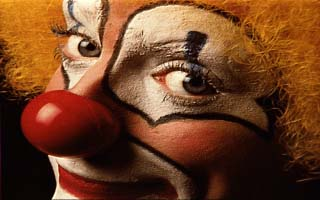

In [3]:
input = ij.scifio().datasetIO().open("http://imagej.net/images/clown.png")

ij.notebook().display(input)

Let's (un)shear this image:

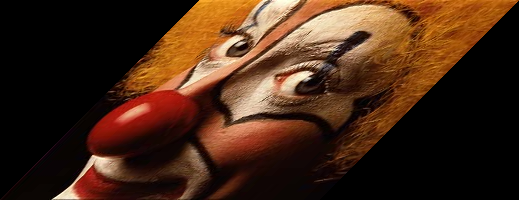

In [4]:
import net.imglib2.FinalInterval
import net.imglib2.view.Views

shearDimension = 0
referenceDimension = 1

extended = ij.op().run("extendZeroView",input)
sheared = ij.op().run("unshearView", extended, input, shearDimension, referenceDimension)

ij.notebook().display(sheared)

Note that we extend the borders on our `Img` first; `unshear` attempts to access the pixels to the left and right of our image, and if they are not defined (as they would be if we did not extend the image) it will throw an `ArrayIndexOutOfBoundsException`.